In [111]:
# Import Library
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [112]:
#Read Dataset, di sini pake yang 2 karena lebih lengkap
df = pd.read_csv('sleepdata_2.csv')

In [113]:
df.head(3)

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (Â°C),Weather type,Notes
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,5/13/2019 6:00,5/13/2019 6:00,True,92.0,0.0,No weather,NaN
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,5/14/2019 5:49,5/14/2019 5:49,True,0.0,0.0,No weather,NaN
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,5/15/2019 5:49,5/15/2019 5:49,True,74.0,0.0,No weather,NaN


### Label Data

In [114]:
print(df.columns)

Index(['Start', 'End', 'Sleep Quality', 'Regularity', 'Mood',
       'Heart rate (bpm)', 'Steps', 'Alarm mode', 'Air Pressure (Pa)', 'City',
       'Movements per hour', 'Time in bed (seconds)', 'Time asleep (seconds)',
       'Time before sleep (seconds)', 'Window start', 'Window stop',
       'Did snore', 'Snore time', 'Weather temperature (Â°C)', 'Weather type',
       'Notes'],
      dtype='object')


# Data Understanding
0. Start : Waktu tidur dimulai
1. End : Waktu tidur selesai
2. Sleep Quality : Presentase kualitas tidur
3. Sleep Regularity : Presentase pattern sleep, semakin tinggi semakin baik (weak positive) 1-((CV(start_time)+CV(End_time))/2)*100
4. Mood : Null, bisa diremove
5. Heart rate : Null, bisa diremove
6. steps : Langkah kaki
7. Alarm mode : normal atau tidak ada
8. Air pressure : Null, bisa diremove
9. City : Null, bisa diremove
10. movement/hour : banyaknya gerakan perjam
11. Time in bed : waktu di tempat tidur, redundant bisa diremove
12. Time asleep : Waktu tidur (bisa menggunakan sleep confidence)
13. Time before sleep : waktu sebelum tidur
14. window start : unnecessary feature, redundant dengan start. Bisa diremove
15. Window stop : unnecessary feature, redundant dengan end. Bisa diremove
16. Did snore : ngorok, mostly True. Bisa diremove
17. snore time : durasi ngorok. Remove
18. Weather Temp : Null, bisa diremove
19. Weather type : Null, bisa diremove

In [115]:
#rename column
df.columns = ['start', 'end', 'quality', 'regularity', 'mood', 'hr', 'steps', 'alarm', 'pa', 'city', 'mph', 'tib', 'ta', 'tbs', 'wst', 'ws', 'ds', 'st', 'wtc', 'wt', 'notes']

In [116]:
df.head(3)

,start,end,quality,regularity,mood,hr,steps,alarm,pa,city,...,tib,ta,tbs,wst,ws,ds,st,wtc,wt,notes
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,5/13/2019 6:00,5/13/2019 6:00,True,92.0,0.0,No weather,NaN
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,5/14/2019 5:49,5/14/2019 5:49,True,0.0,0.0,No weather,NaN
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,5/15/2019 5:49,5/15/2019 5:49,True,74.0,0.0,No weather,NaN


In [117]:
df2 = df.drop(['mood', 'hr', 'steps', 'alarm', 'pa', 'city', 'mph', 'tib','wst', 'ws', 'ds', 'st', 'wtc', 'wt', 'notes'], axis=
1)

In [118]:
df2.head(10)

,start,end,quality,regularity,ta,tbs
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,22993.8,161.9
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,25160.9,192.1
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,28430.8,203.1
3,5/15/2019 23:11,5/16/2019 6:13,77%,92%,23132.5,168.9
4,5/16/2019 23:12,5/17/2019 6:20,78%,94%,22614.6,171.3
5,5/19/2019 1:25,5/19/2019 8:43,72%,80%,20759.8,175.2
6,5/20/2019 22:41,5/21/2019 6:22,73%,58%,24565.2,184.7
7,5/21/2019 22:39,5/22/2019 6:00,78%,77%,22780.4,176.6
8,5/22/2019 22:36,5/23/2019 6:03,84%,98%,25925.9,178.8
9,5/23/2019 23:15,5/24/2019 6:33,88%,95%,23761.4,175.4


In [119]:
#Remove 0 values

df2 = df2[df2.regularity != "0%"]

In [120]:
#strip % and convert to string
df2['regularity'] = df2['regularity'].str.rstrip('%').astype(int)
df2['quality'] = df2['quality'].str.rstrip('%').astype(int)


In [121]:
df2.head()

,start,end,quality,regularity,ta,tbs
2,5/14/2019 21:43,5/15/2019 6:10,86,96,28430.8,203.1
3,5/15/2019 23:11,5/16/2019 6:13,77,92,23132.5,168.9
4,5/16/2019 23:12,5/17/2019 6:20,78,94,22614.6,171.3
5,5/19/2019 1:25,5/19/2019 8:43,72,80,20759.8,175.2
6,5/20/2019 22:41,5/21/2019 6:22,73,58,24565.2,184.7


In [122]:
#strip time data to milli
df2['start'] = df2['start']

In [123]:
#Kita ubah time series jadi second untuk normalisasi
def time_to_seconds(time_str):
    hours, minutes = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60
    return total_seconds
df2['start'] = df2['start'].str[-5:]
df2['end'] = df2['end'].str[-5:]

df2['start'] = df2['start'].apply(time_to_seconds)
df2['end'] = df2['end'].apply(time_to_seconds)



In [124]:
df2.head(5)

,start,end,quality,regularity,ta,tbs
2,78180,22200,86,96,28430.8,203.1
3,83460,22380,77,92,23132.5,168.9
4,83520,22800,78,94,22614.6,171.3
5,5100,31380,72,80,20759.8,175.2
6,81660,22920,73,58,24565.2,184.7


In [125]:
#Disini time series tidur malam kita hitung dari jam 6 malam sampai 6 pagi.
#Jadi kita normalisasi jika user tidur di atas jam 12 malam

df2.loc[df2['start'] < 3600*6, 'start'] = df2.loc[df2['start'] < 3600*6, 'start'] + 3600*24


In [126]:
df2.head(3)


,start,end,quality,regularity,ta,tbs
2,78180,22200,86,96,28430.8,203.1
3,83460,22380,77,92,23132.5,168.9
4,83520,22800,78,94,22614.6,171.3


## EDA

In [127]:
# kualitas tidur paling rendah: 7%
print(df2["quality"].min() / 3600)
print(df2[df2["quality"] == df2["quality"].min()])

0.0019444444444444444
     start    end  quality  regularity      ta   tbs
563  58620  61440        7          45  2798.3  57.1


In [128]:
# kualitas tidur paling tinggi: 100%
print(df2["quality"].max() / 3600)
print(df2[df2["quality"] == df2["quality"].max()])

0.027777777777777776
     start    end  quality  regularity       ta     tbs
20   78420  24420      100          92  29929.0   216.1
63   84240  27660      100          92  27954.0   199.0
69   81900  30900      100          90  35180.8   236.1
73   84480  28200      100          80  28135.1   201.0
76   84780  29700      100          72  28926.9   208.9
83   81660  28860      100          90  29898.9  2687.5
146  77640  21660      100          90  27774.2  1216.4
153  81540  28500      100          88  32510.5   222.7
155  79980  21660      100          88  27905.9   187.3
158  78180  27360      100          88  30721.6  3202.6
163  76860  22920      100          92  31435.4   216.1
165  82200  29040      100          86  33023.5   221.6
166  83880  30780      100          89  33061.1   221.9
168  76380  20160      100          83  29083.1   201.3
178  85200  28980      100          75  29968.4   201.1
191  88320  34140      100          70  31056.3   214.9
225  85320  32460      100 

quality = 7% - 100%

In [129]:
# waktu tidur paling awal: 4 sore
print(df2["start"].min() / 3600)
print(df2[df2["start"] == df2["start"].min()])

6.05
     start    end  quality  regularity   ta  tbs
843  21780  24600       10          23  0.0  0.0


In [130]:
# waktu tidur paling akhir: 2 pagi
print(df2["start"].max() / 3600)
print(df2[df2["start"] == df2["start"].max()])

26.216666666666665
     start    end  quality  regularity       ta    tbs
632  94380  28080       66          80  19719.8  402.4


start = 4 sore - 2 pagi

In [131]:
# waktu bangun paling awal: 1 pagi
print(df2["end"].min() / 3600)
print(df2[df2["end"] == df2["end"].min()])

1.0833333333333333
    start   end  quality  regularity       ta    tbs
49  69900  3900       53          86  17226.6  136.2


In [132]:
# waktu bangun paling akhir: 11 malam
print(df2["end"].max() / 3600)
print(df2[df2["end"] == df2["end"].max()])

23.483333333333334
     start    end  quality  regularity      ta    tbs
823  77100  84540       25          41  7303.4  149.0


end = 1 pagi - 11 malam

In [133]:
# waktu tidur paling sedikit: 0.7 jam
print(df2["ta"].min() / 3600)
print(df2[df2["ta"] == df2["ta"].min()])

0.0
     start    end  quality  regularity   ta  tbs
843  21780  24600       10          23  0.0  0.0
917  60480  63000        9          14  0.0  0.0


In [134]:
# waktu tidur paling banyak: 12 jam
print(df2["ta"].max() / 3600)
print(df2[df2["ta"] == df2["ta"].max()])

12.713722222222223
     start    end  quality  regularity       ta    tbs
809  77460  37740      100          70  45769.4  934.1


ta = 0.7 jam - 12 jam

In [135]:
# waktu sebelum tidur paling sedikit: 0.9 menit
print(df2["tbs"].min() / 60)
print(df2[df2["tbs"] == df2["tbs"].min()])

0.0
     start    end  quality  regularity   ta  tbs
843  21780  24600       10          23  0.0  0.0
917  60480  63000        9          14  0.0  0.0


In [136]:
# waktu sebelum tidur paling banyak: 94 menit
print(df2["tbs"].max() / 60)
print(df2[df2["tbs"] == df2["tbs"].max()])

94.62833333333333
     start    end  quality  regularity       ta     tbs
508  78660  18060       71          95  20129.9  5677.7


tbs = 0.9 menit - 94 menit

In [137]:
df2.size

5466

In [138]:
df2 = df2[df2.ta > 0]

In [139]:
df2.size

5454

## Feature Correlation

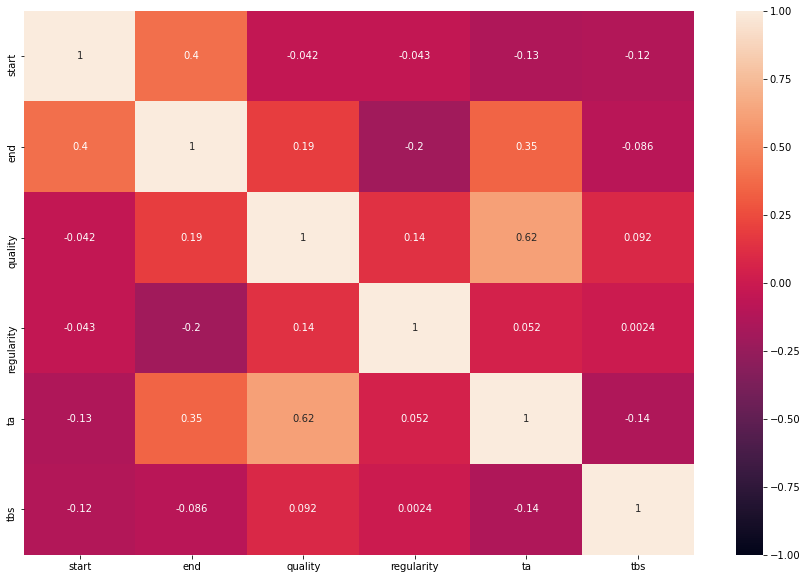

In [140]:
# Matrix Correlation
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), vmin = -1, vmax = 1, annot = True);

## Normalisasi Data

In [141]:
X = df2.iloc[:, df2.columns != "quality"]
y = df2["quality"]

In [142]:
# MinMaxScale Normalization for Features
from sklearn.preprocessing import MinMaxScaler

MMScaler_features = MinMaxScaler()
df_norm_features = MMScaler_features.fit_transform(X)
df_norm_features = pd.DataFrame(df_norm_features, columns=X.columns)
df_norm_features.head(5)

,start,end,regularity,ta,tbs
0,0.546980,0.226935,0.960396,0.596506,0.025976
1,0.694631,0.229167,0.920792,0.473206,0.019891
2,0.696309,0.234375,0.940594,0.461154,0.020318
3,0.919463,0.340774,0.801980,0.417990,0.021012
4,0.644295,0.235863,0.584158,0.506547,0.022702


In [143]:
# MinMaxScale Normalization for Target
MMScaler_target = MinMaxScaler()
df_norm_target = MMScaler_target.fit_transform(np.array(y).reshape(-1, 1))
df_norm_target = pd.DataFrame(df_norm_target, columns=["quality"])
df_norm_target.head(5)

,quality
0,0.849462
1,0.752688
2,0.763441
3,0.698925
4,0.709677


Dari heatmap di atas sebenrnya keliatan bahwa  kualitas tidur palign berpengaruh sama durasi tidurnya, hmm

## Things to take in consideration
1. Start time normalisasinya masih min max, mungkin lebih baik di setting minnya jam 6 malem dan maxnya 6 pagi jadi variancenya gaterlalu besar
2. end time juga mungkin sebaiknya gitu meskipun blm tau waktu yang bagusnya gimana
3. Quality mungkin dijadiin categorical biar lebih 'gampang' groupingnya

In [144]:
df_norm = pd.concat([df_norm_features, df_norm_target], axis=1)

In [145]:
df_norm

,start,end,regularity,ta,tbs,quality
0,0.546980,0.226935,0.960396,0.596506,0.025976,0.849462
1,0.694631,0.229167,0.920792,0.473206,0.019891,0.752688
2,0.696309,0.234375,0.940594,0.461154,0.020318,0.763441
3,0.919463,0.340774,0.801980,0.417990,0.021012,0.698925
4,0.644295,0.235863,0.584158,0.506547,0.022702,0.709677
...,...,...,...,...,...,...
904,0.625839,0.221726,0.861386,0.518518,0.086485,0.698925
905,0.530201,0.145833,0.772277,0.418996,0.076931,0.688172
906,0.498322,0.227679,0.000000,0.506843,0.639078,0.451613
907,0.664430,0.167411,0.227723,0.303983,0.066114,0.752688


In [146]:
df_norm.to_csv('sleepdata_extracted.csv', index=False)

---

In [147]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [148]:
df = pd.read_csv("sleepdata_extracted.csv")
df.head()

,start,end,regularity,ta,tbs,quality
0,0.546980,0.226935,0.960396,0.596506,0.025976,0.849462
1,0.694631,0.229167,0.920792,0.473206,0.019891,0.752688
2,0.696309,0.234375,0.940594,0.461154,0.020318,0.763441
3,0.919463,0.340774,0.801980,0.417990,0.021012,0.698925
4,0.644295,0.235863,0.584158,0.506547,0.022702,0.709677


### Separate features and target

In [149]:
X = df_norm_features
y = df_norm_target

In [150]:
df.shape[0]

909

In [151]:
X.head()

,start,end,regularity,ta,tbs
0,0.546980,0.226935,0.960396,0.596506,0.025976
1,0.694631,0.229167,0.920792,0.473206,0.019891
2,0.696309,0.234375,0.940594,0.461154,0.020318
3,0.919463,0.340774,0.801980,0.417990,0.021012
4,0.644295,0.235863,0.584158,0.506547,0.022702


In [152]:
y.head()

,quality
0,0.849462
1,0.752688
2,0.763441
3,0.698925
4,0.709677


### Train test split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 727
Test set size: 182


### Training

In [155]:
input_shape = (X.shape[1],)
input_shape

(5,)

In [156]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [157]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["mae", "mse"])

In [158]:
validation_data = (X_test, y_test)

history = model.fit(X_train, y_train, epochs=100, validation_data=validation_data)

Epoch 1/100
 7/23 [========>.....................] - ETA: 0s - loss: 0.8156 - mae: 0.3654 - mse: 0.1496WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


23/23 [==============================] - 0s 13ms/step - loss: 0.7675 - mae: 0.3308 - mse: 0.1242 - val_loss: 0.7171 - val_mae: 0.2931 - val_mse: 0.1007
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6944 - mae: 0.2739 - mse: 0.0881 - val_loss: 0.6576 - val_mae: 0.2409 - val_mse: 0.0710
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6189 - mae: 0.2000 - mse: 0.0507 - val_loss: 0.5849 - val_mae: 0.1590 - val_mse: 0.0357
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5595 - mae: 0.1249 - mse: 0.0230 - val_loss: 0.5480 - val_mae: 0.1062 - val_mse: 0.0197
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5374 - mae: 0.0926 - mse: 0.0139 - val_loss: 0.5413 - val_mae: 0.0985 - val_mse: 0.0173
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5345 - mae: 0.0882 - mse: 0.0130 - val_loss: 0.5414 - val_mae: 0.0993 - val_mse: 0.0174
Epoch 7/100
23/23 [==============

### Evaluation

In [159]:
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

In [160]:
print("Training MAE:", mae[-1])
print("Testing MAE:", val_mae[-1])

print("\nTraining MSE:", mse[-1])
print("Testing MSE:", val_mse[-1])

print("\nTraining loss:", loss[-1])
print("Testing loss:", val_loss[-1])

Training MAE: 0.06911832839250565
Testing MAE: 0.07620586454868317

Training MSE: 0.008580799214541912
Testing MSE: 0.011290392838418484

Training loss: 0.5220296382904053
Testing loss: 0.5247519612312317


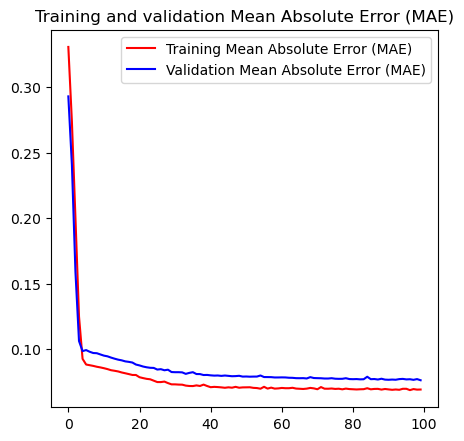

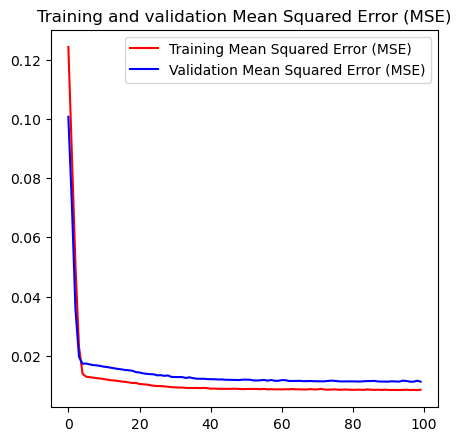

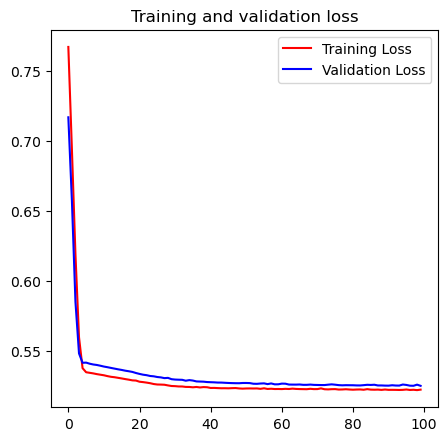

In [161]:
# MAE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mae, 'r', label='Training Mean Absolute Error (MAE)')
plt.plot(epochs, val_mae, 'b', label='Validation Mean Absolute Error (MAE)')
plt.title('Training and validation Mean Absolute Error (MAE)')
plt.legend()

# MSE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mse, 'r', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse, 'b', label='Validation Mean Squared Error (MSE)')
plt.title('Training and validation Mean Squared Error (MSE)')
plt.legend()

# Loss
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test

In [162]:
new_data = pd.DataFrame([[83460, 22380, 92, 23132.5, 168.9]], columns=X.columns) # quality = 77

normalized_data = pd.DataFrame(MMScaler_features.transform(new_data), columns=X.columns)

predictions = model.predict(normalized_data)

predictions

array([[0.723081]], dtype=float32)

In [163]:
denormalized_predictions = MMScaler_target.inverse_transform(predictions)

denormalized_predictions

array([[74.24653]], dtype=float32)

### Saving Model

In [164]:
model.save("model.h5")

In [165]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open("model.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\yusuf\AppData\Local\Temp\tmp_6ltewtt\assets


INFO:tensorflow:Assets written to: C:\Users\yusuf\AppData\Local\Temp\tmp_6ltewtt\assets


4644